# Imports

In [ ]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, label_binarize

In [ ]:
data = joblib.load("data_splits.pkl")
X_train = np.asarray(data["X_train"])
X_val   = np.asarray(data["X_val"])
X_test  = np.asarray(data["X_test"])
y_train = np.asarray(data["y_train"], int)
y_val   = np.asarray(data["y_val"],   int)
y_test  = np.asarray(data["y_test"],  int)

num_classes = y_train.max() + 1
D = X_train.shape[1]


In [ ]:
def softmax(x):
    e = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e / np.sum(e, axis=1, keepdims=True)

def plot_accuracy(epochs, train_accs, val_accs, test_accs, title):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs + 1), train_accs, label="Train")
    plt.plot(range(1, epochs + 1), val_accs, label="Validation")
    plt.plot(range(1, epochs + 1), test_accs, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()
    plt.show()

def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

def plot_roc_curves(y_true, probs, num_classes):
    # Binarize true labels with specified classes
    y_test_bin = label_binarize(y_true, classes=range(num_classes))
    # Adjust for binary classification: ensure two columns if necessary.
    if num_classes == 2 and y_test_bin.shape[1] == 1:
        y_test_bin = np.hstack([1 - y_test_bin, y_test_bin])
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

def plot_pr_curves(y_true, probs, num_classes):
    # Binarize the true labels.
    y_test_bin = label_binarize(y_true, classes=range(num_classes))
    # Adjust for binary classification.
    if num_classes == 2 and y_test_bin.shape[1] == 1:
        y_test_bin = np.hstack([1 - y_test_bin, y_test_bin])
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], probs[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend(loc='lower left')
    plt.show()


In [ ]:
W = np.zeros((D, num_classes))
b = np.zeros((1, num_classes))

In [ ]:
LR     = 0.003
EPOCHS = 100

In [ ]:
train_accs_slp = []
val_accs_slp   = []
test_accs_slp  = []

In [ ]:

for epoch in range(1, EPOCHS + 1):
    for x, y in zip(X_train, y_train):
        x = x.reshape(1, -1)
        scores = x.dot(W) + b
        pred = np.argmax(scores, axis=1)[0]
        if pred != y:
            W[:, y]   += LR * x.flatten()
            W[:, pred] -= LR * x.flatten()
            b[0, y]   += LR
            b[0, pred] -= LR

    def eval_acc(X, y):
        preds = np.argmax(X.dot(W) + b, axis=1)
        return accuracy_score(y, preds)

    train_acc = eval_acc(X_train, y_train)
    val_acc   = eval_acc(X_val, y_val)
    test_acc  = eval_acc(X_test, y_test)

    train_accs_slp.append(train_acc)
    val_accs_slp.append(val_acc)
    test_accs_slp.append(test_acc)

    if epoch % 10 == 0 or epoch == 1 or epoch == EPOCHS:
        print(f"Epoch {epoch}/{EPOCHS} — Train Acc: {train_acc:.4f} — Val Acc: {val_acc:.4f} — Test Acc: {test_acc:.4f}")


Epoch 1/100 — Train Acc: 0.8953 — Val Acc: 0.8925 — Test Acc: 0.8945
Epoch 10/100 — Train Acc: 0.8980 — Val Acc: 0.8962 — Test Acc: 0.8985
Epoch 20/100 — Train Acc: 0.9014 — Val Acc: 0.8997 — Test Acc: 0.9036
Epoch 30/100 — Train Acc: 0.8974 — Val Acc: 0.8958 — Test Acc: 0.8986
Epoch 40/100 — Train Acc: 0.9085 — Val Acc: 0.9063 — Test Acc: 0.9099
Epoch 50/100 — Train Acc: 0.9033 — Val Acc: 0.9011 — Test Acc: 0.9021
Epoch 60/100 — Train Acc: 0.9017 — Val Acc: 0.8987 — Test Acc: 0.9027
Epoch 70/100 — Train Acc: 0.9088 — Val Acc: 0.9067 — Test Acc: 0.9095
Epoch 80/100 — Train Acc: 0.9146 — Val Acc: 0.9108 — Test Acc: 0.9171
Epoch 90/100 — Train Acc: 0.8740 — Val Acc: 0.8731 — Test Acc: 0.8733
Epoch 100/100 — Train Acc: 0.8896 — Val Acc: 0.8884 — Test Acc: 0.8894


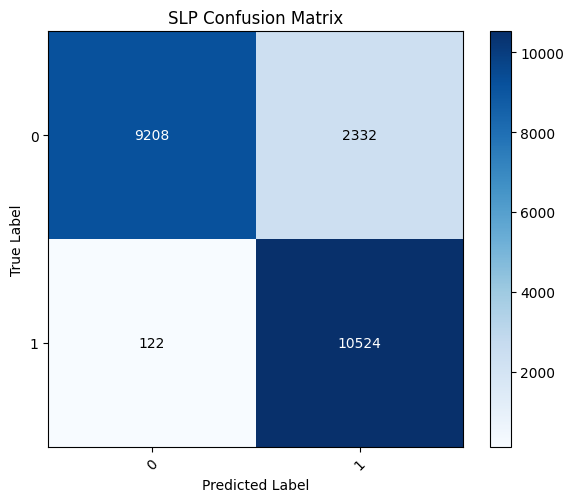

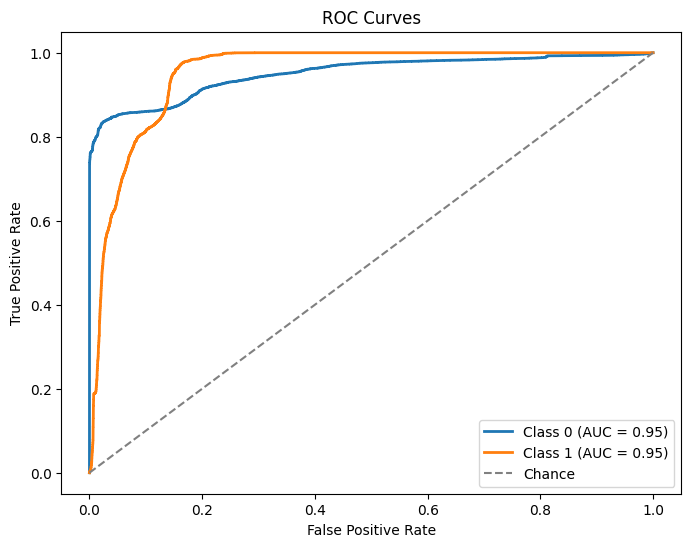

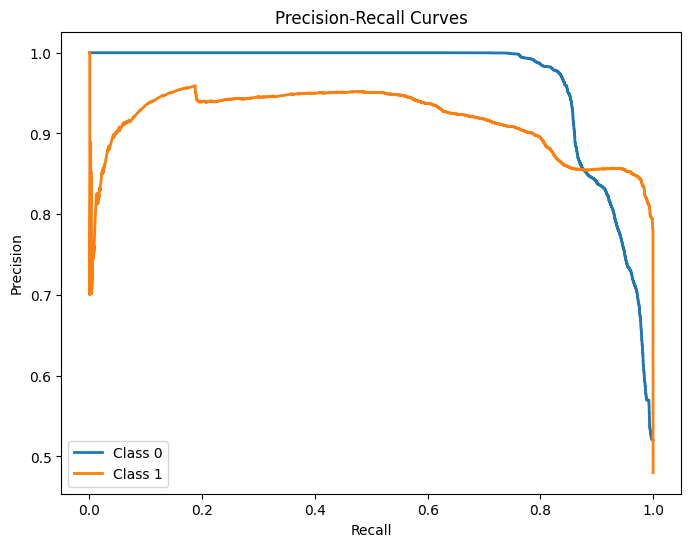


SLP Classification Report on Test Set:

              precision    recall  f1-score   support

           0       0.99      0.80      0.88     11540
           1       0.82      0.99      0.90     10646

    accuracy                           0.89     22186
   macro avg       0.90      0.89      0.89     22186
weighted avg       0.91      0.89      0.89     22186



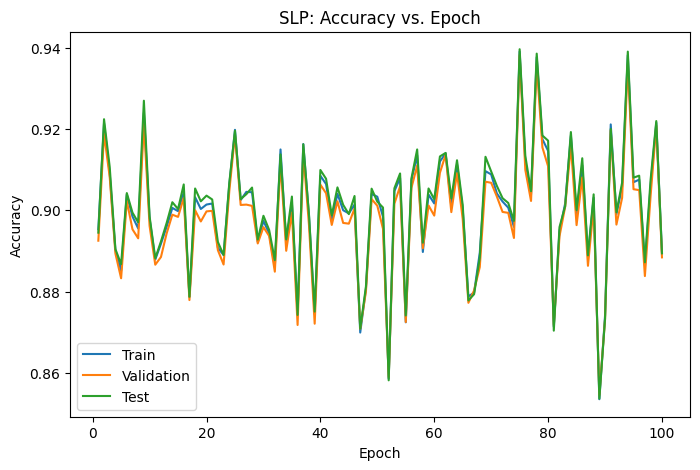

In [ ]:
test_scores_slp = X_test.dot(W) + b
probs_slp = softmax(test_scores_slp)
final_preds_slp = np.argmax(test_scores_slp, axis=1)

cm_slp = confusion_matrix(y_test, final_preds_slp)
plot_confusion_matrix(cm_slp, classes=[str(i) for i in range(num_classes)],
                      title="SLP Confusion Matrix")

plot_roc_curves(y_test, probs_slp, num_classes)

plot_pr_curves(y_test, probs_slp, num_classes)

print("\nSLP Classification Report on Test Set:\n")
print(classification_report(y_test, final_preds_slp))

plot_accuracy(EPOCHS, train_accs_slp, val_accs_slp, test_accs_slp,
              title="SLP: Accuracy vs. Epoch")


In [ ]:
H1, H2       = 64, 32
LR           = 0.0003
EPOCHS       = 500
BATCH_SIZE   = 128
β1, β2, ϵ    = 0.9, 0.999, 1e-8
PATIENCE     = 5

In [ ]:
C = num_classes
def one_hot(y):
    return np.eye(C)[y]

y_train_oh = one_hot(y_train)
y_val_oh   = one_hot(y_val)

In [ ]:
W1 = np.random.randn(D, H1) * np.sqrt(2 / D);  b1 = np.zeros((1, H1))
W2 = np.random.randn(H1, H2) * np.sqrt(2 / H1); b2 = np.zeros((1, H2))
W3 = np.random.randn(H2, C) * np.sqrt(2 / H2);  b3 = np.zeros((1, C))

mW1, vW1 = np.zeros_like(W1), np.zeros_like(W1)
mW2, vW2 = np.zeros_like(W2), np.zeros_like(W2)
mW3, vW3 = np.zeros_like(W3), np.zeros_like(W3)
mb1, vb1 = np.zeros_like(b1), np.zeros_like(b1)
mb2, vb2 = np.zeros_like(b2), np.zeros_like(b2)
mb3, vb3 = np.zeros_like(b3), np.zeros_like(b3)
t = 0


In [ ]:
def relu(x):
    return np.maximum(0, x)
def mlp_softmax(x):
    e = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e / np.sum(e, axis=1, keepdims=True)
def ce_loss(pred, tgt):
    return -np.mean(np.sum(tgt * np.log(pred + 1e-9), axis=1))

In [ ]:
train_accs_mlp = []
val_accs_mlp   = []
test_accs_mlp  = []

best_val_loss = np.inf
wait = 0
best_params = None

for epoch in range(1, EPOCHS + 1):
    perm = np.random.permutation(len(X_train))
    Xs, Ys = X_train[perm], y_train_oh[perm]

    for i in range(len(X_train) // BATCH_SIZE):
        xb = Xs[i * BATCH_SIZE:(i + 1) * BATCH_SIZE]
        yb = Ys[i * BATCH_SIZE:(i + 1) * BATCH_SIZE]

        z1 = xb.dot(W1) + b1; a1 = relu(z1)
        z2 = a1.dot(W2) + b2; a2 = relu(z2)
        z3 = a2.dot(W3) + b3; out = mlp_softmax(z3)

        d3 = out - yb
        dW3 = a2.T.dot(d3) / BATCH_SIZE
        db3 = np.sum(d3, axis=0, keepdims=True) / BATCH_SIZE

        d2 = d3.dot(W3.T) * (a2 > 0)
        dW2 = a1.T.dot(d2) / BATCH_SIZE
        db2 = np.sum(d2, axis=0, keepdims=True) / BATCH_SIZE

        d1 = d2.dot(W2.T) * (a1 > 0)
        dW1 = xb.T.dot(d1) / BATCH_SIZE
        db1 = np.sum(d1, axis=0, keepdims=True) / BATCH_SIZE

        t += 1
        for param, grad, m, v in [
            (W1, dW1, mW1, vW1), (b1, db1, mb1, vb1),
            (W2, dW2, mW2, vW2), (b2, db2, mb2, vb2),
            (W3, dW3, mW3, vW3), (b3, db3, mb3, vb3),
        ]:
            m[:] = β1 * m + (1 - β1) * grad
            v[:] = β2 * v + (1 - β2) * (grad ** 2)
            m_hat = m / (1 - β1 ** t)
            v_hat = v / (1 - β2 ** t)
            param[:] -= LR * m_hat / (np.sqrt(v_hat) + ϵ)

    def eval_acc_mlp(X, y_true):
        h1 = relu(X.dot(W1) + b1)
        h2 = relu(h1.dot(W2) + b2)
        preds = mlp_softmax(h2.dot(W3) + b3).argmax(axis=1)
        return accuracy_score(y_true, preds)

    train_acc = eval_acc_mlp(X_train, y_train)
    val_acc   = eval_acc_mlp(X_val, y_val)
    test_acc  = eval_acc_mlp(X_test, y_test)

    train_accs_mlp.append(train_acc)
    val_accs_mlp.append(val_acc)
    test_accs_mlp.append(test_acc)

    print(f"Epoch {epoch}/{EPOCHS} — Train Acc: {train_acc:.4f} — Val Acc: {val_acc:.4f} — Test Acc: {test_acc:.4f}")

    h1_val = relu(X_val.dot(W1) + b1)
    h2_val = relu(h1_val.dot(W2) + b2)
    val_out = mlp_softmax(h2_val.dot(W3) + b3)
    val_loss = ce_loss(val_out, y_val_oh)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0
        best_params = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
    else:
        wait += 1
        if wait >= PATIENCE:
            print(f"Early stopping at epoch {epoch}")
            W1, b1, W2, b2, W3, b3 = best_params
            break


Epoch 1/500 — Train Acc: 0.9731 — Val Acc: 0.9715 — Test Acc: 0.9755
Epoch 2/500 — Train Acc: 0.9813 — Val Acc: 0.9797 — Test Acc: 0.9827
Epoch 3/500 — Train Acc: 0.9842 — Val Acc: 0.9822 — Test Acc: 0.9848
Epoch 4/500 — Train Acc: 0.9860 — Val Acc: 0.9847 — Test Acc: 0.9862
Epoch 5/500 — Train Acc: 0.9865 — Val Acc: 0.9853 — Test Acc: 0.9869
Epoch 6/500 — Train Acc: 0.9876 — Val Acc: 0.9863 — Test Acc: 0.9880
Epoch 7/500 — Train Acc: 0.9881 — Val Acc: 0.9871 — Test Acc: 0.9883
Epoch 8/500 — Train Acc: 0.9890 — Val Acc: 0.9881 — Test Acc: 0.9894
Epoch 9/500 — Train Acc: 0.9892 — Val Acc: 0.9882 — Test Acc: 0.9894
Epoch 10/500 — Train Acc: 0.9893 — Val Acc: 0.9880 — Test Acc: 0.9899
Epoch 11/500 — Train Acc: 0.9905 — Val Acc: 0.9895 — Test Acc: 0.9907
Epoch 12/500 — Train Acc: 0.9914 — Val Acc: 0.9905 — Test Acc: 0.9918
Epoch 13/500 — Train Acc: 0.9931 — Val Acc: 0.9923 — Test Acc: 0.9932
Epoch 14/500 — Train Acc: 0.9935 — Val Acc: 0.9923 — Test Acc: 0.9939
Epoch 15/500 — Train Acc: 0.9

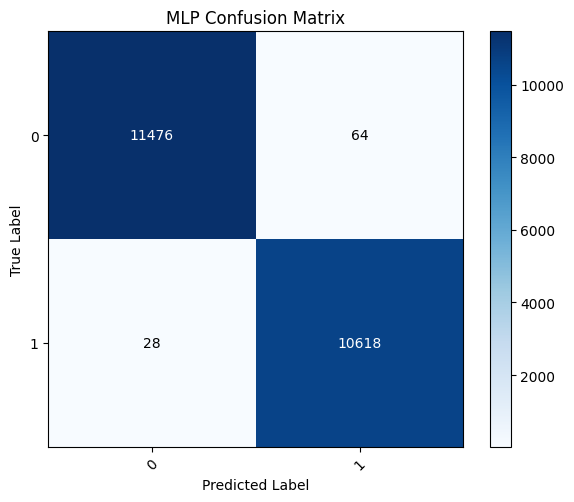

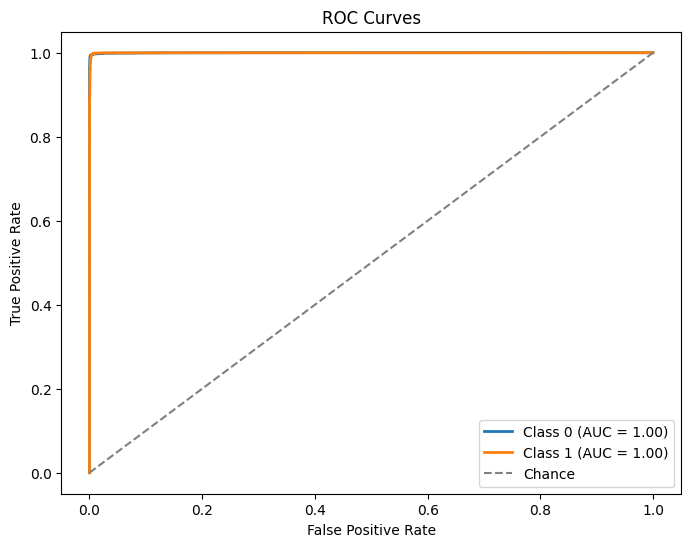

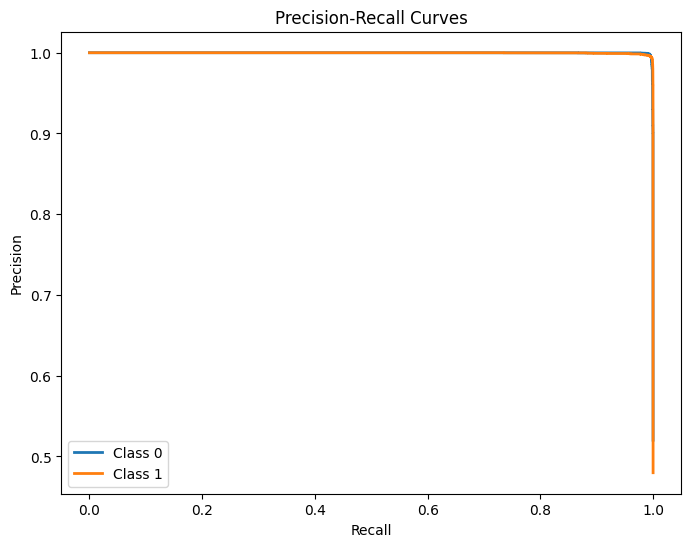


MLP Classification Report on Test Set:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11540
           1       0.99      1.00      1.00     10646

    accuracy                           1.00     22186
   macro avg       1.00      1.00      1.00     22186
weighted avg       1.00      1.00      1.00     22186



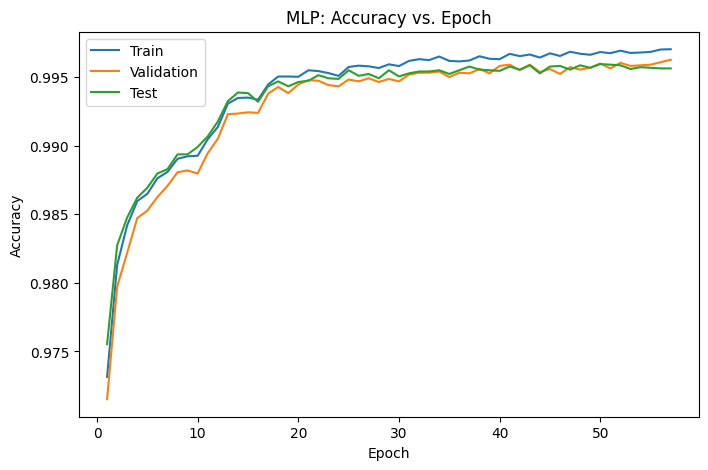

In [ ]:

# Final evaluation on Test set for MLP
h1_test = relu(X_test.dot(W1) + b1)
h2_test = relu(h1_test.dot(W2) + b2)
test_scores_mlp = h2_test.dot(W3) + b3
probs_mlp = mlp_softmax(test_scores_mlp)
final_preds_mlp = np.argmax(probs_mlp, axis=1)

cm_mlp = confusion_matrix(y_test, final_preds_mlp)
plot_confusion_matrix(cm_mlp, classes=[str(i) for i in range(num_classes)],
                      title="MLP Confusion Matrix")

plot_roc_curves(y_test, probs_mlp, num_classes)

plot_pr_curves(y_test, probs_mlp, num_classes)

print("\nMLP Classification Report on Test Set:\n")
print(classification_report(y_test, final_preds_mlp))

plot_accuracy(len(train_accs_mlp), train_accs_mlp, val_accs_mlp, test_accs_mlp,
              title="MLP: Accuracy vs. Epoch")
